In [1]:
import numpy as np
from scipy.stats import norm, multivariate_normal

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd
%matplotlib notebook

In [2]:
%matplotlib notebook

### Import example univariate dataset of fries
Source: https://bookdown.org/pkaldunn/DataFiles/WeightFries.html

In [3]:
df = pd.read_csv('fries.csv')
df.head(n=5)

,Wt
0,117.0
1,126.0
2,128.0
3,132.0
4,133.0


<IPython.core.display.Javascript object>


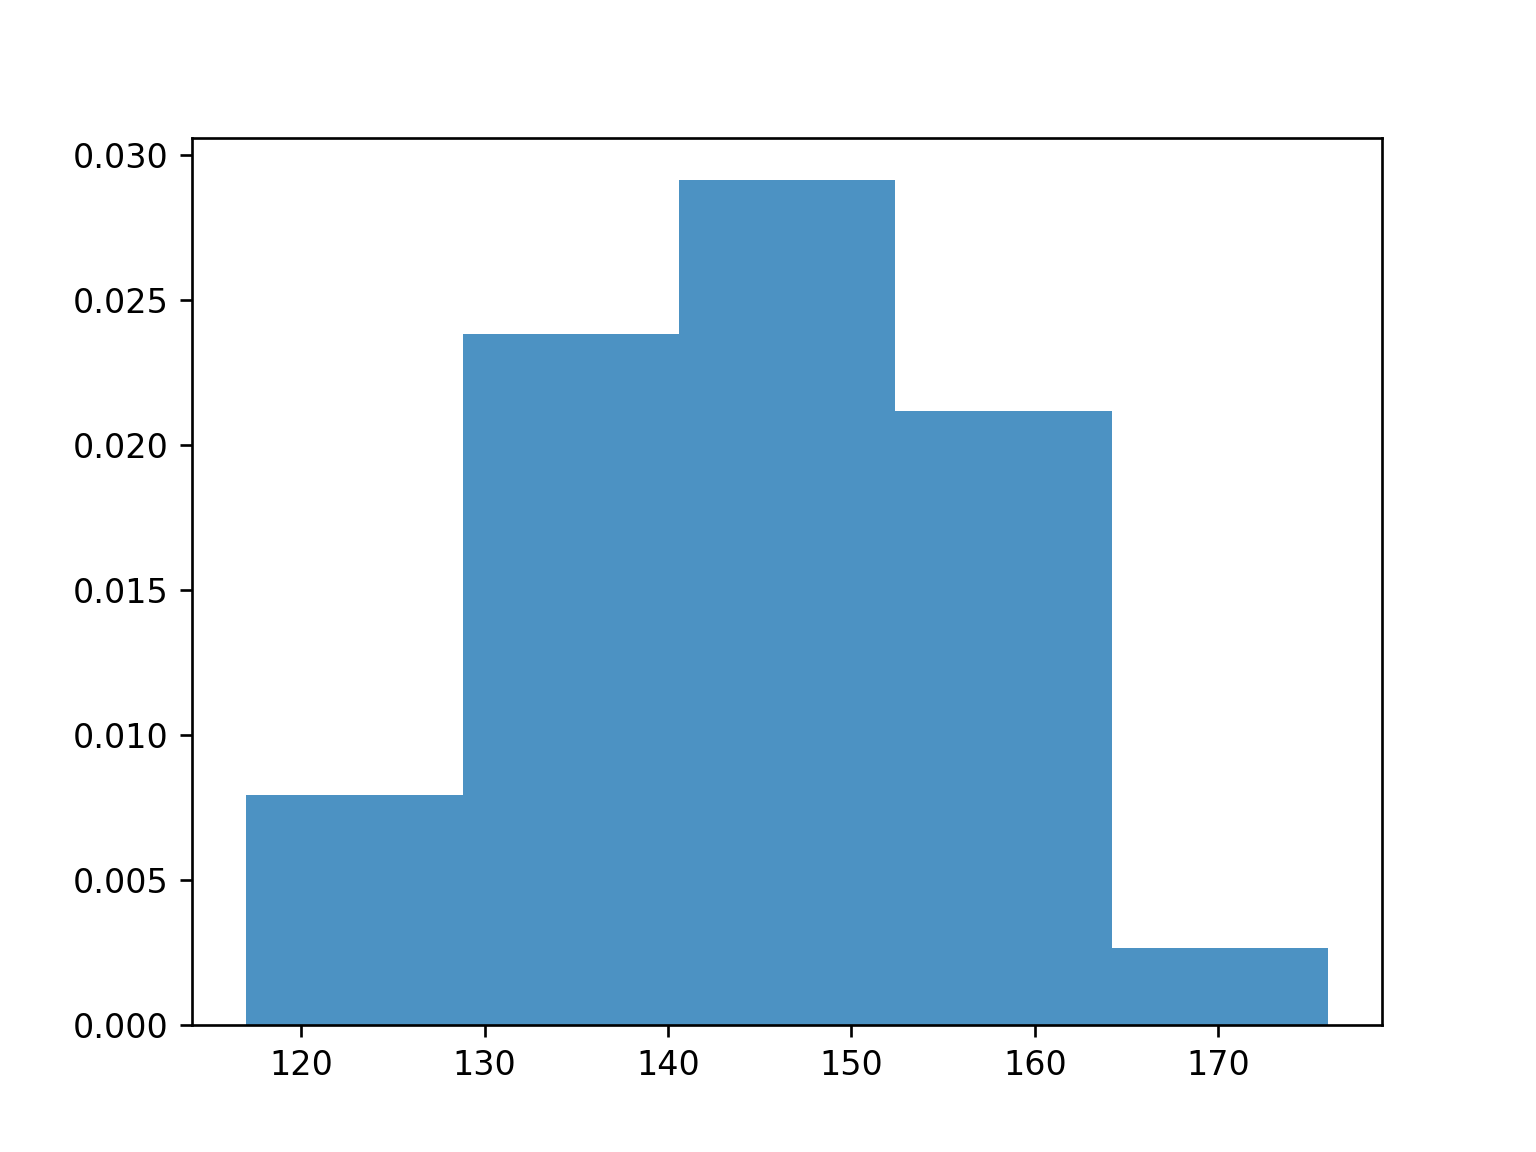

(array([0.00794492, 0.02383475, 0.02913136, 0.02118644, 0.00264831]),
 array([117. , 128.8, 140.6, 152.4, 164.2, 176. ]),
 <BarContainer object of 5 artists>)

In [6]:
plt.figure()


plt.hist(df['Wt'],bins=5, alpha=0.8,density=True)

# x_axis = np.arange(120,170,1)
# mu = 145
# s2 = 100
# plt.plot(x_axis, norm.pdf(x_axis,mu,np.sqrt(s2)),c='b',label='rough fit')
# plt.legend()

<IPython.core.display.Javascript object>


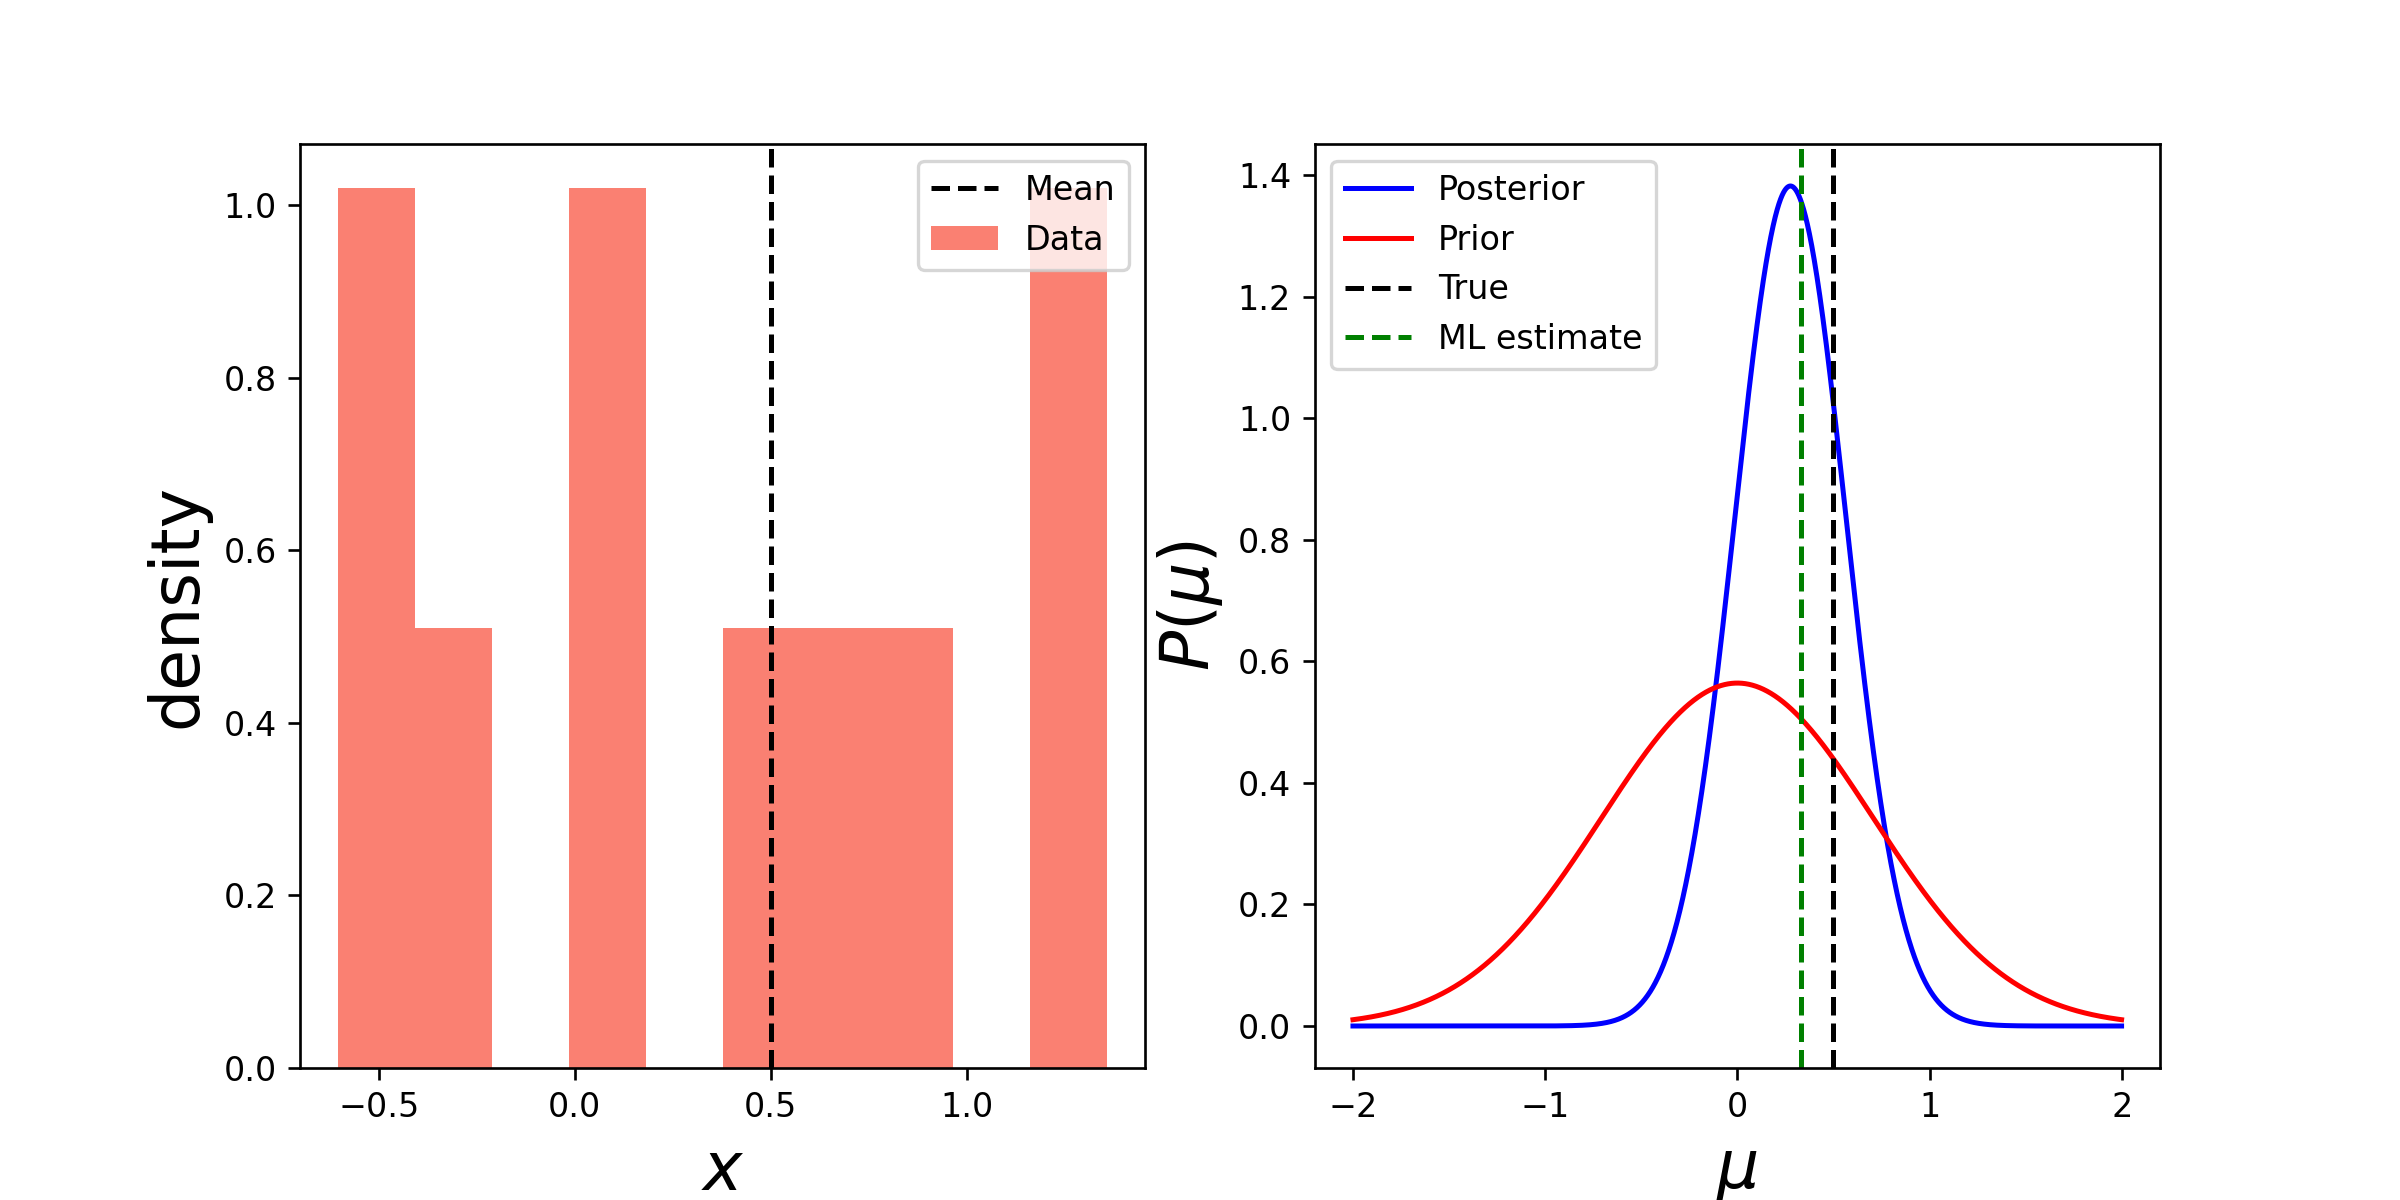

In [32]:
N=10

'''
Data
'''
mu_true=0.5 
s=1.     

x_sample=np.random.normal(mu_true,np.sqrt(s),N)

'''
ML estimate or empirical mean
'''
muML=sum(x_sample)/float(N)
sML=(sum((x_sample-muML)**2))/float(N)

'''
Prior
'''
mu0=0.0
s0=0.5

'''
Posterior
'''
muN = mu0*s/(N*s0+s) + muML*N*s0/(N*s0+s)
sN = 1./(1./s0+N/s)

plt.figure(figsize = (10,5))

### Observed data
plt.subplot(1,2,1)
plt.hist(x_sample,label = 'Data',density=True, color='salmon')
plt.axvline(x=mu_true,c='black',label='Mean',linestyle='--')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel('density',fontsize=20)
plt.legend()

# Plot between -10 and 10 with .001 steps
plt.subplot(1,2,2)
x_axis = np.arange(-2., 2., 0.001)

plt.plot(x_axis, norm.pdf(x_axis,muN,np.sqrt(sN)),c='b',label='Posterior')
plt.plot(x_axis, norm.pdf(x_axis,mu0,np.sqrt(s0)),c='r',label='Prior')

plt.axvline(x=mu_true,c='black',label='True',linestyle='--')
plt.axvline(x=muML,c='g',label='ML estimate',linestyle='--')
# plt.plot(x_axis, norm.pdf(x_axis,mu_true,np.sqrt(s)),c='g',label='True ')
# plt.plot(x_axis, norm.pdf(x_axis,muML,np.sqrt(sML)),c='black',label='ML')
plt.xlabel(r'$\mu$',fontsize=20)
plt.ylabel(r'$P(\mu)$',fontsize=20)

# plt.ylim([0,0.5])
plt.legend()

# Multivariate Guassian

https://peterroelants.github.io/posts/multivariate-normal-primer/



<IPython.core.display.Javascript object>


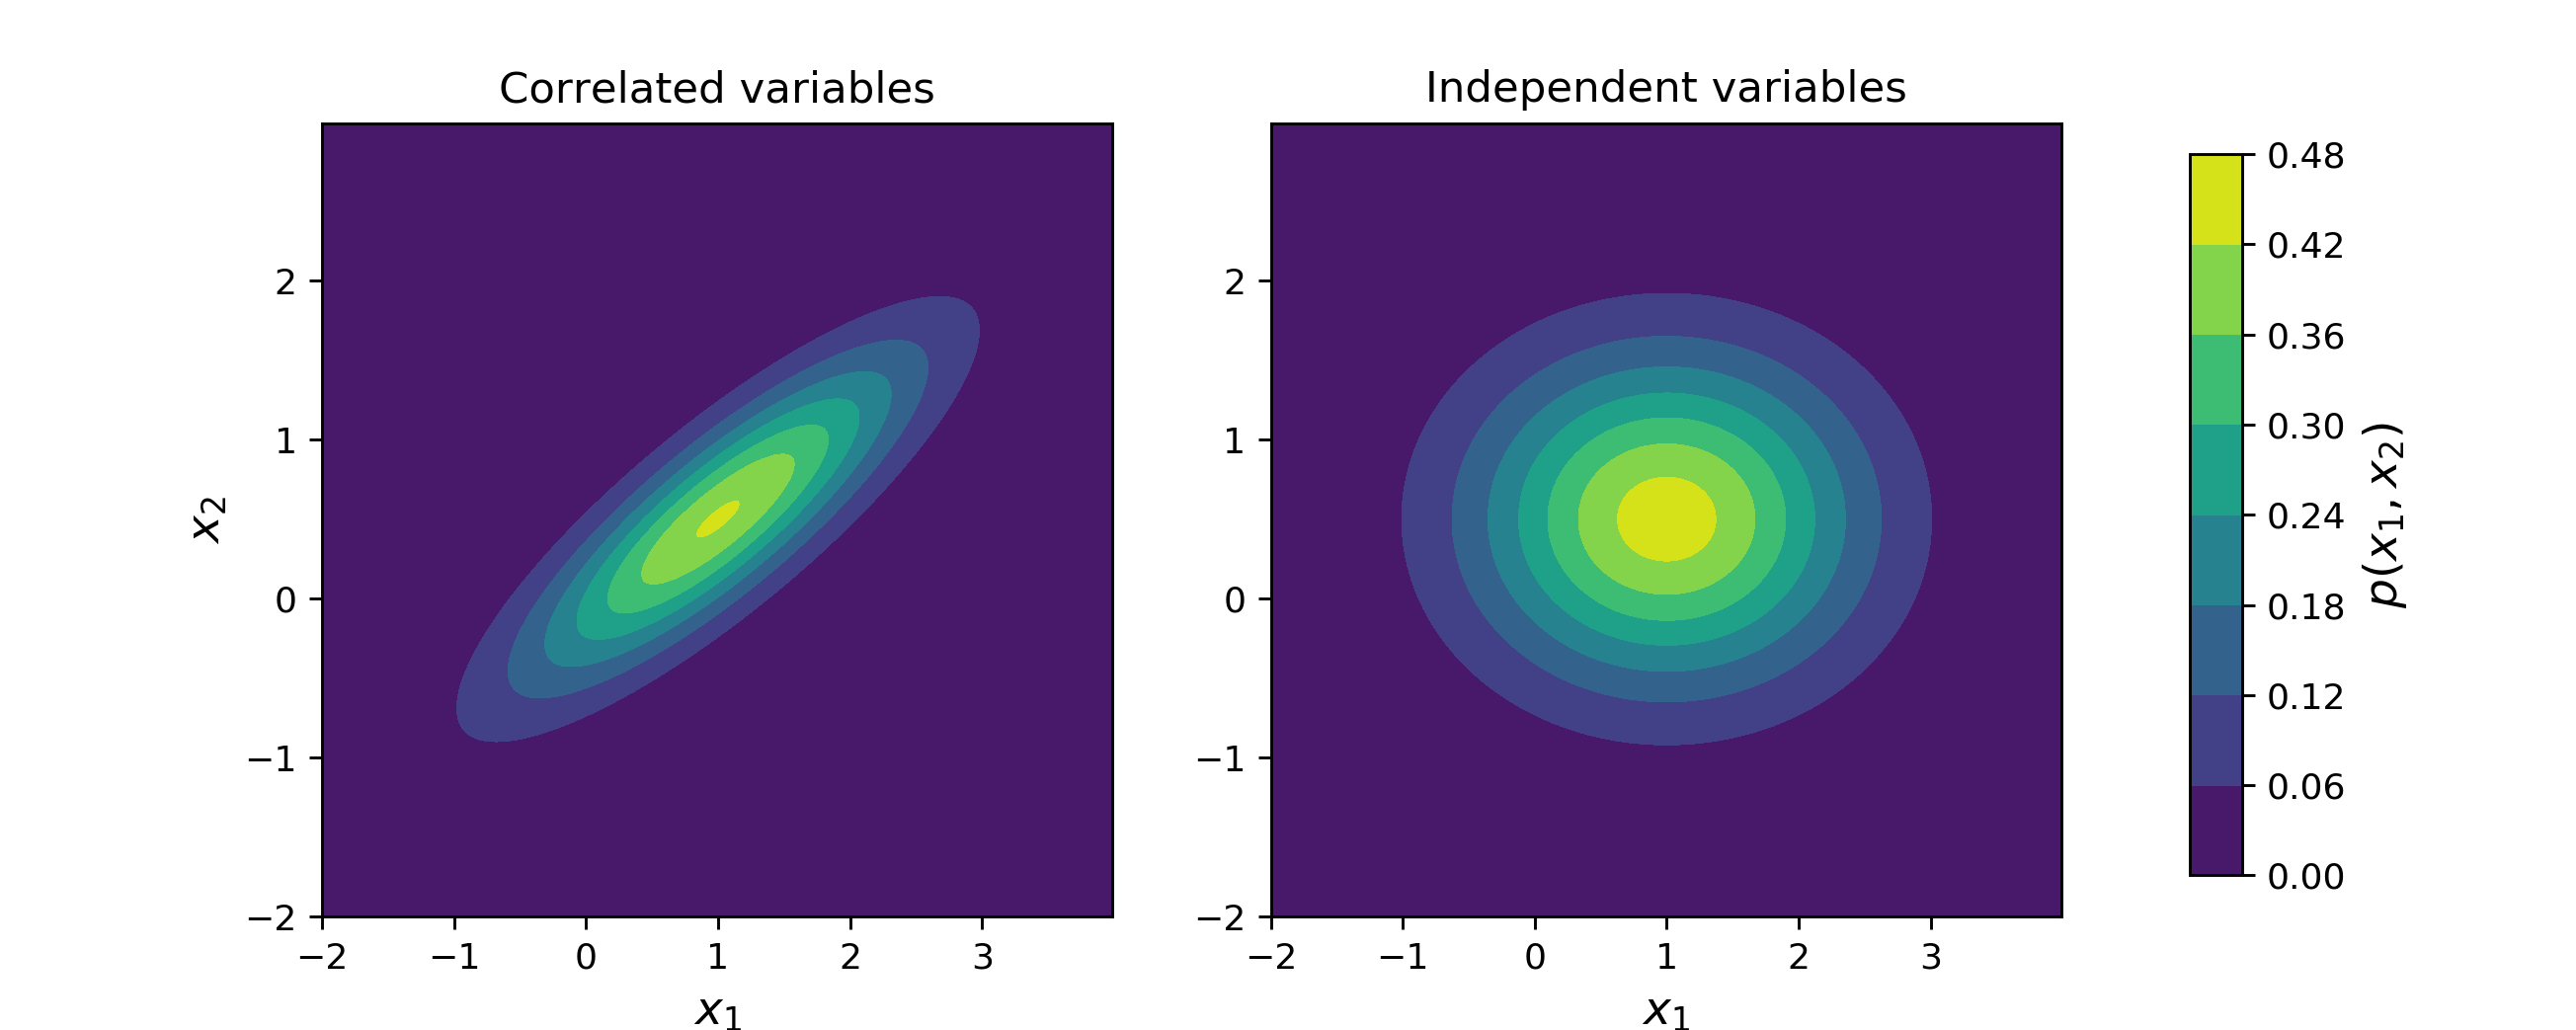

In [17]:
x_axis,y_axis = np.mgrid[-2:4:.01, -2:3:.01]

mu1=1.0  # Input
mu2=0.5  # Input

s1=1.0  # Input
s2=0.5  # Input
s12=0.6 # Input  --> play with this!

rv_indep = multivariate_normal([mu1, mu2], [[s1, 0.0], [0.0, s2]])
rv = multivariate_normal([mu1, mu2], [[s1, s12], [s12, s2]])
pos = np.empty(x_axis.shape + (2,))
pos[:, :, 0] = x_axis; pos[:, :, 1] = y_axis

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# Plot of correlated Normals
con=ax1.contourf(x_axis, y_axis, rv.pdf(pos))
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.set_title('Correlated variables')

# Plot of independent Normals
ax2.contourf(x_axis, y_axis, rv_indep.pdf(pos))
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_title('Independent variables')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
fig.show()

## Marginal distribution

In the 2D multivariate normal the marginal distibutions are the univariate distributions of each component seperately

<IPython.core.display.Javascript object>


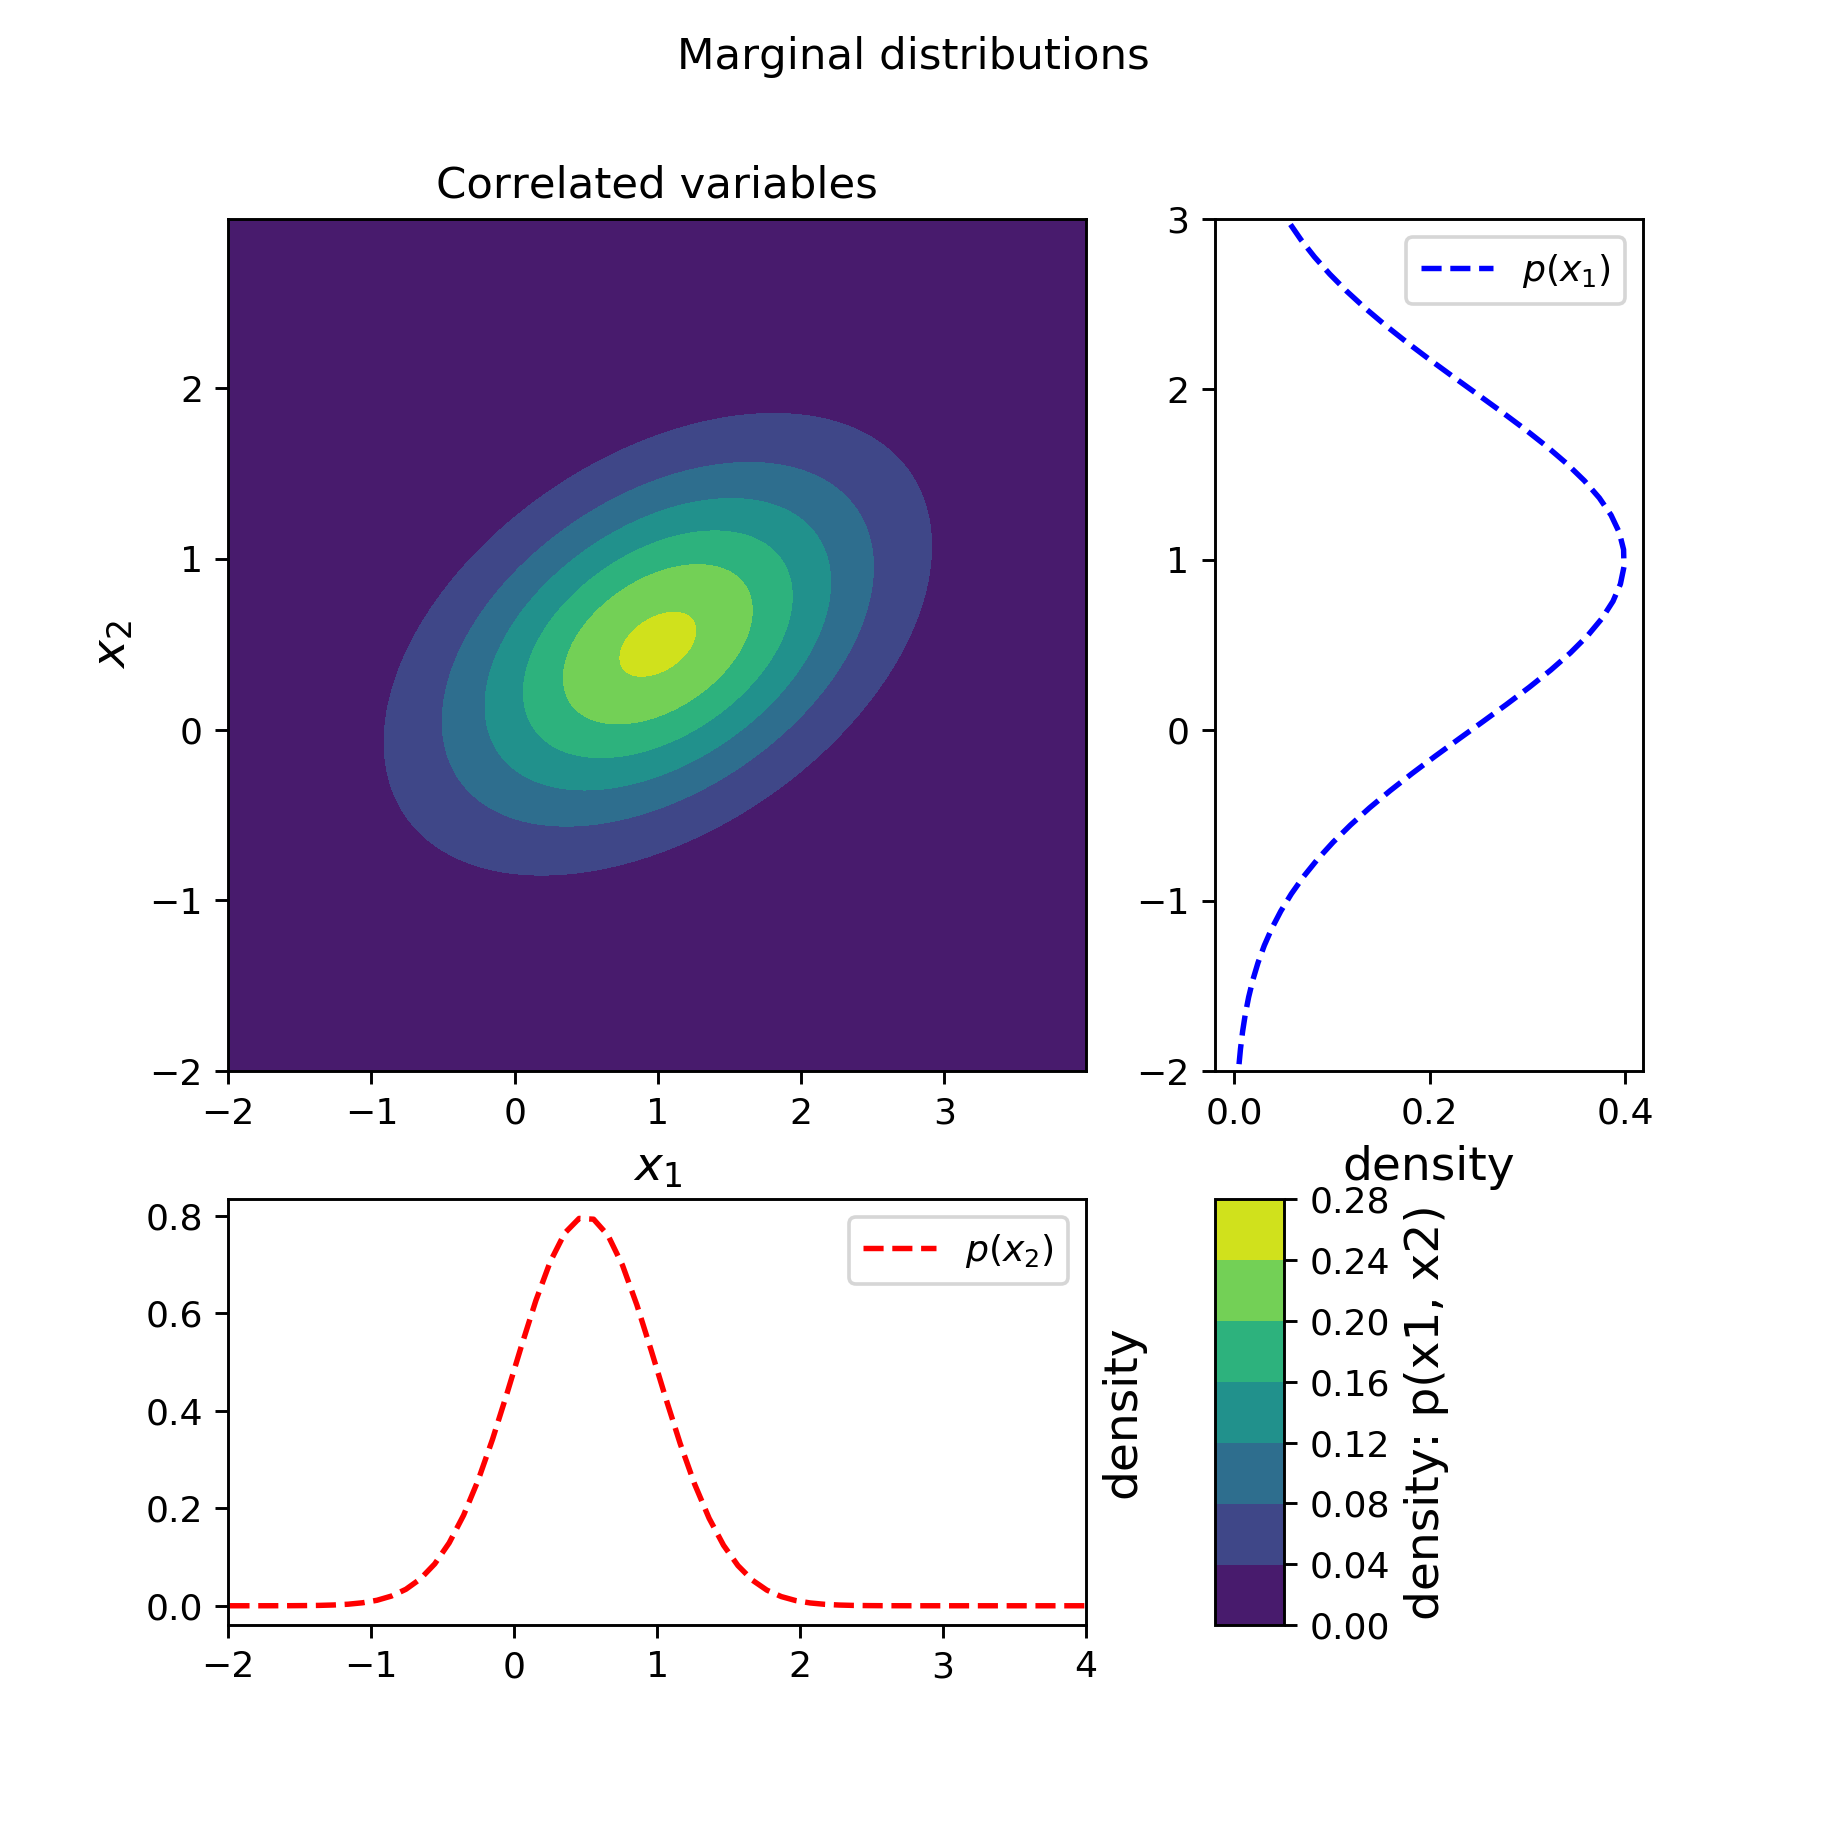

In [18]:
mu1=1.0  # Input
mu2=0.5  # Input

s1=1.0  # Input
s2=0.5  # Input
s12=0.3 # Input  --> play with this!

# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])

plt.suptitle('Marginal distributions', y=0.98)

# Plot surface on top left
ax1 = plt.subplot(gs[0])

# Plot of correlated Normals
rv = multivariate_normal([mu1, mu2], [[s1, s12], [s12, s2]])
pos = np.empty(x_axis.shape + (2,))
pos[:, :, 0] = x_axis; pos[:, :, 1] = y_axis

con=ax1.contourf(x_axis, y_axis, rv.pdf(pos))
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.set_title('Correlated variables')

# Plot y
ax2 = plt.subplot(gs[1])
x1 = np.linspace(-5, 5, num=100)
p1 = norm.pdf(x1,mu1,s1)
# Plot univariate distribution
ax2.plot(p1, x1, 'b--', label=f'$p(x_1)$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-2., 3)

# Plot x
ax3 = plt.subplot(gs[2])
x2 = np.linspace(-5, 5, num=100)
p2 = norm.pdf(x2,mu2,s2)
# Plot univariate distribution
ax3.plot(x2, p2, 'r--', label=f'$p(x_2)$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2., 4.)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: p(x1, x2)', fontsize=13)
plt.show()


## Conditional distribution

In [19]:
# Calculate x1|x2
x2_condition = 1.  # To condition on x2
mean_1given2 = mu1 + (s1 * (1/s2) * (x2_condition - mu2))
cov_1given2 = s1 - s12 * (1/s2) * s12

# Calculate y|x
x1_condition = -1.  # To condition on x1
mean_2given1 = mu2 + (s12 * (1/s1) * (x1_condition - mu1))
cov_2given1 = s2 - (s12 * (1/s1) * s12)

<IPython.core.display.Javascript object>


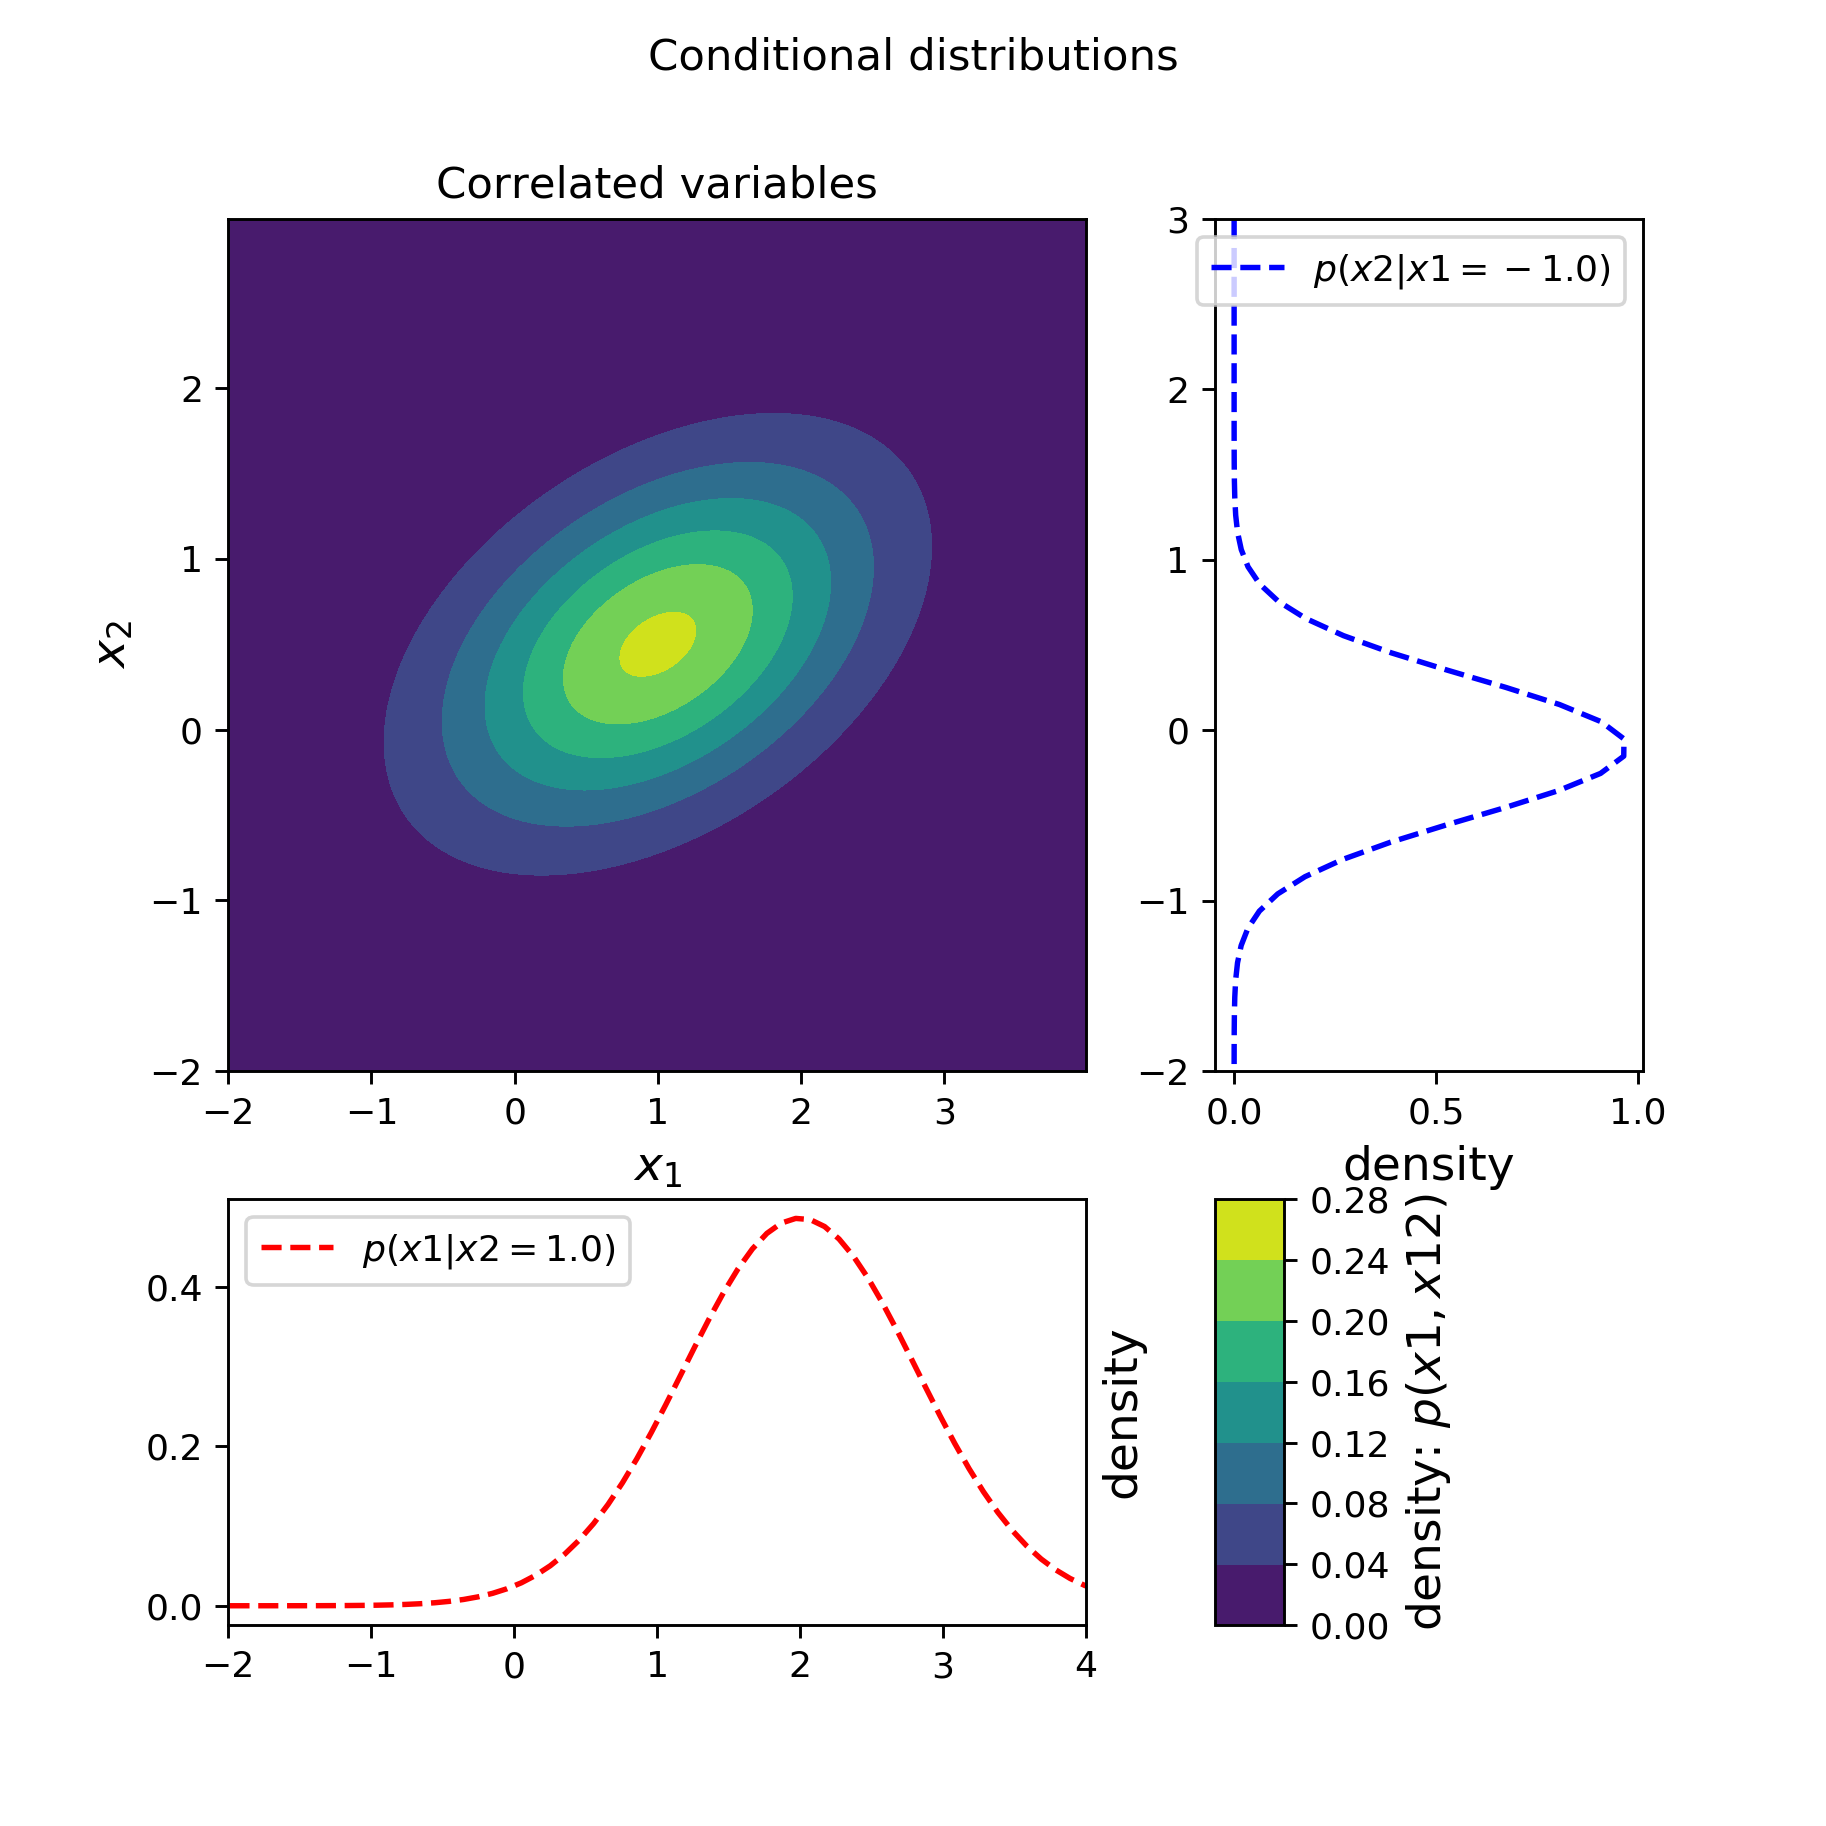

In [20]:
mu1=1.0  # Input
mu2=0.5  # Input

s1=1.0  # Input
s2=0.5  # Input
s12=0.3 # Input  --> play with this!

# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Conditional distributions', y=0.98)

# Plot surface on top left
ax1 = plt.subplot(gs[0])

# Plot of correlated Normals
rv = multivariate_normal([mu1, mu2], [[s1, s12], [s12, s2]])
pos = np.empty(x_axis.shape + (2,))
pos[:, :, 0] = x_axis; pos[:, :, 1] = y_axis

con=ax1.contourf(x_axis, y_axis, rv.pdf(pos))
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.set_title('Correlated variables')

# Plot y|x
ax2 = plt.subplot(gs[1])
x1 = np.linspace(-5, 5, num=100)
p21=norm.pdf(x1,mean_2given1, cov_2given1)
# Plot univariate distribution
ax2.plot(p21, x1, 'b--', 
         label=f'$p(x2|x1={x1_condition:.1f})$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-2, 3.)

# Plot x|y
ax3 = plt.subplot(gs[2])
x2 = np.linspace(-5, 5, num=100)
p12 = norm.pdf(x2,mean_1given2, cov_1given2)
# Plot univariate distribution
ax3.plot(x2, p12, 'r--', 
         label=f'$p(x1|x2={x2_condition:.1f})$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2., 4)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x1, x12)$', fontsize=13)
plt.show()